### Data exploration/ pre-processing ###

In [1]:
import pandas as pd


df = pd.read_csv('Assignment DataSet.csv')

#df.info()
df.head()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,0,41186889,Caucasian,Female,[80-90),1,6,7,13,69,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,1,83591073,Caucasian,Female,[80-90),6,1,17,5,34,...,No,No,Steady,No,No,No,No,No,No,NO
2,2,68337009,Other,Male,[60-70),1,2,1,1,37,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,3,73175076,Caucasian,Male,[40-50),1,1,7,4,56,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,4,31718349,Caucasian,Female,[70-80),1,1,7,1,38,...,No,No,Steady,No,No,No,No,No,No,NO


### ERASING REPEATED PATIENTS

In [2]:

duplicates = df[df['patient_nbr'].duplicated(keep=False)] 
last_occurrences = duplicates.drop_duplicates(subset='patient_nbr', keep='last')
#df.head()
df = pd.concat([df.drop(duplicates.index), last_occurrences])
#df.head()

# number of rows 

print(df.shape[0])

4837


### ERASING COLUMNS FIRST TWO COLUMNS

In [25]:
columns_to_remove = [0, 1, 2] # List of column positions not interesting for the work
df = df.drop(df.columns[columns_to_remove], axis=1)

df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,Female,[80-90),1,6,7,13,69,4,38,0,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,Female,[80-90),6,1,17,5,34,0,4,0,...,No,No,Steady,No,No,No,No,No,No,NO
2,Male,[60-70),1,2,1,1,37,1,13,3,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,Male,[40-50),1,1,7,4,56,2,22,0,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,Female,[70-80),1,1,7,1,38,2,1,0,...,No,No,Steady,No,No,No,No,No,No,NO


### Correlation between diagnosis

In [26]:

columns_corr=['diag_1','diag_2','diag_3','diag_4']
correlation=[]
columns=[]
for i in columns_corr:
    for j in columns_corr:
        correlation.append(df[i].corr(df[j]))
        columns.append(i+','+j)



print(correlation)
print(columns)



[1.0, 0.026858235098138325, 0.032446436795047856, 0.010502490939179147, 0.026858235098138325, 1.0, 0.08757760173616524, 0.8953080129126207, 0.032446436795047856, 0.08757760173616523, 0.9999999999999999, 0.08302054301549167, 0.010502490939179146, 0.8953080129126207, 0.08302054301549167, 1.0]
['diag_1,diag_1', 'diag_1,diag_2', 'diag_1,diag_3', 'diag_1,diag_4', 'diag_2,diag_1', 'diag_2,diag_2', 'diag_2,diag_3', 'diag_2,diag_4', 'diag_3,diag_1', 'diag_3,diag_2', 'diag_3,diag_3', 'diag_3,diag_4', 'diag_4,diag_1', 'diag_4,diag_2', 'diag_4,diag_3', 'diag_4,diag_4']


### Removing diag_4 due to high correlation with diag_2

In [27]:
df = df.drop('diag_4', axis=1)

df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted
0,Female,[80-90),1,6,7,13,69,4,38,0,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
1,Female,[80-90),6,1,17,5,34,0,4,0,...,No,No,Steady,No,No,No,No,No,No,NO
2,Male,[60-70),1,2,1,1,37,1,13,3,...,No,No,Steady,Steady,No,No,No,No,Yes,NO
3,Male,[40-50),1,1,7,4,56,2,22,0,...,No,No,Steady,Up,No,No,No,Ch,Yes,YES
4,Female,[70-80),1,1,7,1,38,2,1,0,...,No,No,Steady,No,No,No,No,No,No,NO


### Removing 'No' columns  

In [28]:
columns_to_remove = [18,20,23,25,30] # List of column positions not interesting for the work
df = df.drop(df.columns[columns_to_remove], axis=1)

### Removing columns with zero variance

In [29]:
variances=[]
column_number=[]
number=0
for column in df.columns:
    column_data = df[column]  # Get the actual column data
    number+=1
    if column_data.dtype == 'object':
        # If the column is nominal, encode it numerically and calculate variance
        encoded_column = pd.factorize(column_data)[0]
        variance = encoded_column.var()
        if variance<0.1:
            variances.append(variance)
            column_number.append(number)

    else:
        # If the column is numerical, directly calculate variance
        variance = column_data.var()
        if variance<0.1:
            variances.append(variance)
            column_number.append(number)

print(variances)
print(column_number)

df = df.drop(df.columns[column_number], axis=1)


[0.001859588899551896, 0.08458641948740432, 0.07863452115564465, 0.07503348033636897, 0.0002066969733895598, 0.05648375195525462, 0.0002066969733895598]
[17, 18, 20, 21, 22, 25, 26]


### From numerical to nominal of admission_type_id

In [30]:
mapping = {
    1: 'Urgency',
    2: 'Urgency',
    3: 'Elective',
    4: 'Newborn',
    5: 'Unknown',
    6: 'Unknown',
    7: 'Urgency',
    8: 'Unknown'
}

df['admission_type_id'] = df['admission_type_id'].map(mapping)
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,diag_1,diag_2,diag_3,number_diagnoses,chlorpropamide,pioglitazone,insulin,glyburide-metformin,diabetesMed,readmitted
0,Female,[80-90),Urgency,6,7,13,69,4,38,0,...,410.0,996.00,879.0,9,No,No,Steady,No,Yes,NO
1,Female,[80-90),Unknown,1,17,5,34,0,4,0,...,434.0,204.00,453.0,7,No,No,No,No,No,NO
2,Male,[60-70),Urgency,2,1,1,37,1,13,3,...,576.0,250.00,401.0,5,No,No,Steady,No,Yes,NO
3,Male,[40-50),Urgency,1,7,4,56,2,22,0,...,535.0,250.12,584.0,9,No,No,Up,No,Yes,YES
4,Female,[70-80),Urgency,1,7,1,38,2,1,0,...,831.0,881.00,571.0,7,No,No,No,No,No,NO


### From numerical to nominal of admission_source_id

In [31]:

healthcare_arr=[1,2,3,4,5,6]

def map_numerical_to_nominal(value):
    if value in healthcare_arr:
        return 'Healthcare'
    elif value == 7:
        return 'Emergency'
    else:
        return 'Unknown'

df['admission_source_id'] = df['admission_source_id'].apply(map_numerical_to_nominal)

### From numerical to nominal of diag_1, diag_2 and diag_3

In [32]:
def map_numerical_to_nominal_2(value):
    if 390 <= value <= 459 or value == 785:
        return 'Circulatory'
    elif value == 250:
        return 'Diabetes'
    elif 460 <= value <= 519 or value == 786:
        return 'Respiratory'
    elif 520 <= value <= 579 or value == 787:
        return 'Digestive'
    elif 800 <= value <= 999:
        return 'Injury'
    elif 710 <= value <= 739:
        return 'Musculoskeletal'
    elif 580 <= value <= 629 or value == 788:
        return 'Genitourinary'
    else:
        return 'Unknown'
    
df['diag_1'] = df['diag_1'].apply(map_numerical_to_nominal_2)
df['diag_2'] = df['diag_2'].apply(map_numerical_to_nominal_2)
df['diag_3'] = df['diag_3'].apply(map_numerical_to_nominal_2)


### From numerical to nominal of discharge_disposition_id

In [33]:
hospital_arr=[2,3,4,5,6,7,9,10,15,16,17,22,23,2427,28,30]
home_arr=[1,8]
unknow_arr=[18,25,26]
hospice_arr=[13,14]

def map_numerical_to_nominal_3(value):
    if value in hospital_arr:
        return 'Hospital'
    elif value in  home_arr:
        return 'Home'
    elif value in  hospice_arr:
        return 'Hospice'
    else:
        return 'Unknown'
    
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(map_numerical_to_nominal_3)
df.head()

new_file_name = 'modified_nominal_file.csv'
df.to_csv(new_file_name, index=False)

### From nominal to numerical for age

In [34]:
nominal_values_arr=['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']
def map_nominal_to_numerical(value):
    if value=='[0-10)':
        return 0.1
    if value=='[10-20)':
        return 0.2
    if value=='[20-30)':
        return 0.3
    if value=='[30-40)':
        return 0.4
    if value=='[40-50)':
        return 0.5
    if value=='[50-60)':
        return 0.6
    if value=='[60-70)':
        return 0.7
    if value=='[70-80)':
        return 0.8
    if value=='[80-90)':
        return 0.9
    if value=='[90-100)':
        return 1.0
    else:
        return 0
    
df['age'] = df['age'].apply(map_nominal_to_numerical)

### From yes/no male/female etce to binary

In [35]:

def map_gender(value):
    if value=='Female':
        return 1
    else:
        return 0
    
df['gender'] = df['gender'].apply(map_gender)

def map_yes_no(value):
    if value=='Yes' or value=='YES':
        return 1
    else:
        return 0
    
df['diabetesMed'] = df['diabetesMed'].apply(map_yes_no)
df['readmitted'] = df['readmitted'].apply(map_yes_no)

def map_No_up_steady(value):
    if value=='No':
        return 0
    elif value=='Up':
        return 1
    else:
        return 0.5
    
df['chlorpropamide'] = df['chlorpropamide'].apply(map_No_up_steady)
    
def map_No_Up_Steady_Down(value):
    if value=='No':
        return 0
    elif value=='Steady':
        return 0.66
    elif value=='Up':
        return 1
    else:
        return 0.33
    
df['pioglitazone'] = df['pioglitazone'].apply(map_No_Up_Steady_Down)
df['glyburide-metformin'] = df['glyburide-metformin'].apply(map_No_Up_Steady_Down)
df['insulin'] = df['insulin'].apply(map_No_Up_Steady_Down)

def map_admision_type(value):
    if value=='Urgency':
        return 1
    elif value=='Elective':
        return 0
    elif value=='Newborn':
        return 0.33
    else:
        return 0.66
    
df['admission_type_id'] = df['admission_type_id'].apply(map_admision_type)

def map_admision_source(value):
    if value=='Healthcare':
        return 0
    elif value=='Emergency':
        return 1
    else:
        return 0.5

df['admission_source_id'] = df['admission_source_id'].apply(map_admision_source)

def map_discharge_disposition(value):
    if value=='Hospital':
        return 1
    elif value=='Home':
        return 0
    elif value=='Hospice':
        return 0.33
    else:
        return 0.66
    
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(map_discharge_disposition)


### Mapping diagnosis to numerical

In [36]:

def map_diag(value):
        if value=='Circulatory':
            return 0.75
        if value=='Diabetes':
            return 1
        if value=='Respiratory':
            return 0.625
        if value=='Digestive':
            return 0.875
        if value=='Musculoskeletal':
            return 0.5
        if value=='Genitourinary':
            return 0.375
        if value=='Injury':
            return 0
        else:
            return 0.125
        
df['diag_1'] = df['diag_1'].apply(map_diag)
df['diag_2'] = df['diag_2'].apply(map_diag)
df['diag_3'] = df['diag_3'].apply(map_diag)

new_file_name = 'modified_file.csv'
df.to_csv(new_file_name, index=False)

### Results of classification task

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


df_2 = pd.read_csv('modified_file.csv')
num_rows = df_2.shape[0]
print("Number of rows:", num_rows)

df_3= pd.read_csv('modified_nominal_file.csv')

df_3.head()


Number of rows: 4837


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,diag_1,diag_2,diag_3,number_diagnoses,chlorpropamide,pioglitazone,insulin,glyburide-metformin,diabetesMed,readmitted
0,Female,[80-90),Urgency,Hospital,Emergency,13,69,4,38,0,...,Circulatory,Injury,Injury,9,No,No,Steady,No,Yes,NO
1,Female,[80-90),Unknown,Home,Unknown,5,34,0,4,0,...,Circulatory,Unknown,Circulatory,7,No,No,No,No,No,NO
2,Male,[60-70),Urgency,Hospital,Healthcare,1,37,1,13,3,...,Digestive,Diabetes,Circulatory,5,No,No,Steady,No,Yes,NO
3,Male,[40-50),Urgency,Home,Emergency,4,56,2,22,0,...,Digestive,Unknown,Genitourinary,9,No,No,Up,No,Yes,YES
4,Female,[70-80),Urgency,Home,Emergency,1,38,2,1,0,...,Injury,Injury,Digestive,7,No,No,No,No,No,NO


### KNN, Gaussian naive Bayes and SVM

KNN result with cross validation: 0.5451682599422136


<Figure size 640x480 with 0 Axes>

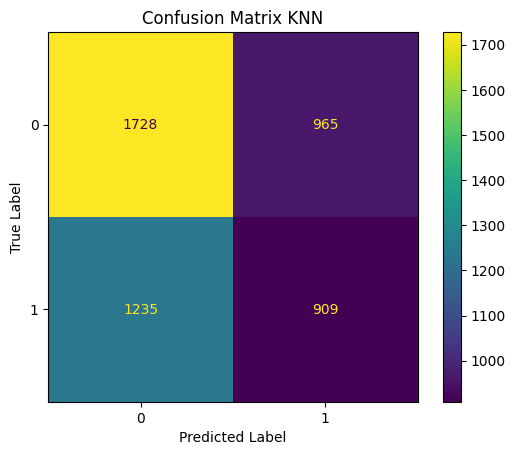

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


dFeat = df_2.iloc[:, 0:21]
dClass=df_2.iloc[:,-1]

kf=KFold(n_splits=6)
score=[]

sum_confusion_matrix=[]

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(dFeat_training,dClass_training)
    score.append(model.score(dFeat_test, dClass_test))

    y_pred = model.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)

    
print(f'KNN result with cross validation: {np.mean(score)}')

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-KNN.png')



### Gaussian naive Bayes numerical dataset

GNB result with cross validation: 0.46123917787186763


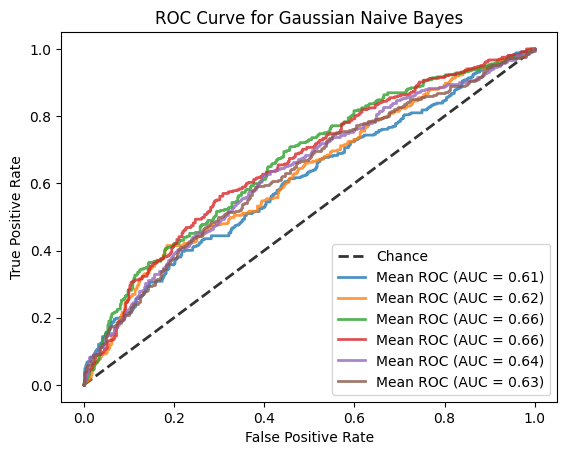

<Figure size 640x480 with 0 Axes>

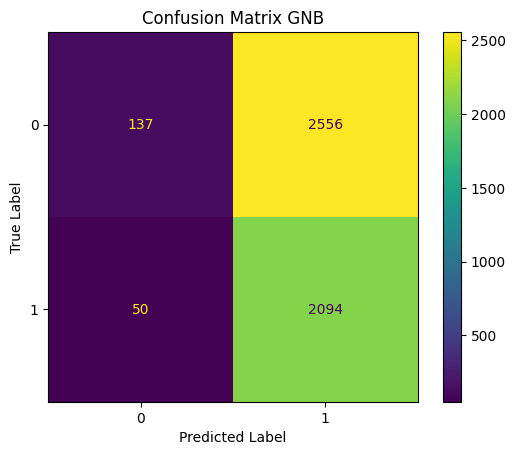

In [37]:
from sklearn.naive_bayes import GaussianNB

score=[]

tprs = []
mean_fpr = np.linspace(0, 1, 100)

sum_confusion_matrix=[]


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_gnb = GaussianNB()
    model_gnb.fit(dFeat_training,dClass_training)
    score.append(model_gnb.score(dFeat_test, dClass_test))

    # ROC curve
    y_score = model_gnb.predict_proba(dFeat_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(dClass_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, label=f'Mean ROC (AUC = {roc_auc:.2f})', lw=2, alpha=.8)

    # Confusion matrix
    y_pred = model_gnb.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)


print(f'GNB result with cross validation: {np.mean(score)}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.savefig('ROC-GNB.png')
plt.show()

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model_gnb.classes_)
disp.plot()
plt.title('Confusion Matrix GNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-GNB.png')

### SVM

SVM result with cross validation: 0.5900313427894672


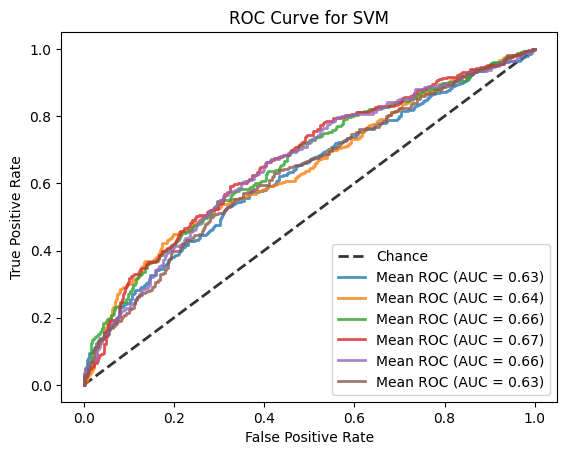

<Figure size 640x480 with 0 Axes>

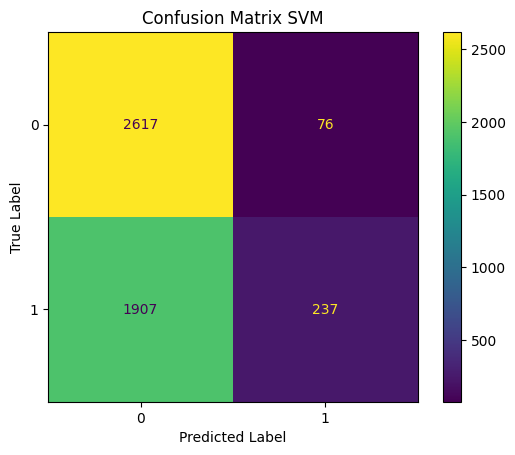

In [20]:
from sklearn import svm

score=[]

tprs = []
mean_fpr = np.linspace(0, 1, 100)

sum_confusion_matrix=[]


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_svm = svm.SVC()
    model_svm.fit(dFeat_training,dClass_training)
    score.append(model_svm.score(dFeat_test, dClass_test))

    # ROC curve
    y_score = model_svm.decision_function(dFeat_test)
    
    fpr, tpr, _ = roc_curve(dClass_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Mean ROC (AUC = {roc_auc:.2f})', lw=2, alpha=.8)

    # Confusion matrix
    y_pred = model_svm.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)

print(f'SVM result with cross validation: {np.mean(score)}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.savefig('ROC-SVM.png')
plt.show()

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model_svm.classes_)
disp.plot()
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-SVM.png')

### Random Forest

RF result with cross validation: 0.6336588555679574


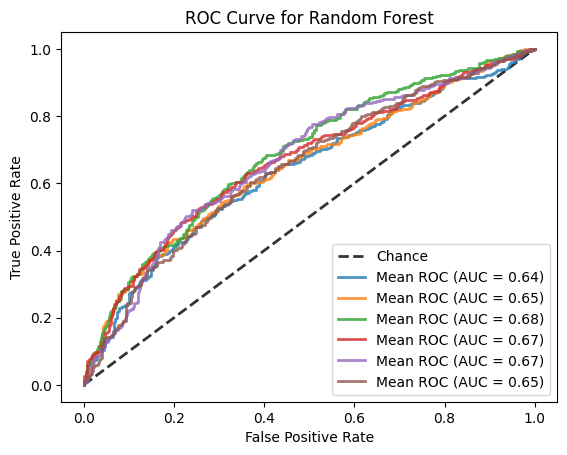

<Figure size 640x480 with 0 Axes>

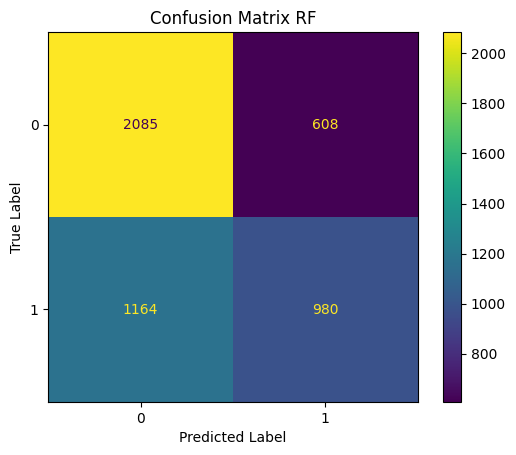

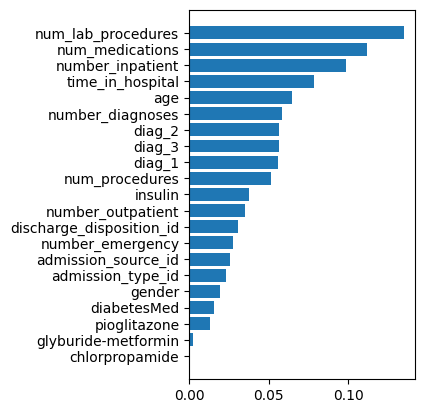

In [41]:
from sklearn.ensemble import RandomForestClassifier


score=[]
tprs = []
mean_fpr = np.linspace(0, 1, 100)
sum_confusion_matrix=[]

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)

for train, test in kf.split(dFeat,dClass):
    dClass_training=dClass.iloc[train]
    dClass_test=dClass.iloc[test]
    dFeat_training=dFeat.iloc[train,:]
    dFeat_test=dFeat.iloc[test,:]

    model_rf = RandomForestClassifier(n_estimators=1000, min_samples_split=10)
    model_rf.fit(dFeat_training,dClass_training)
    score.append(model_rf.score(dFeat_test, dClass_test))

    # Predict probabilities
    y_score = model_rf.predict_proba(dFeat_test)[:, 1]
    
    # Compute ROC curve and area under the curve
    fpr, tpr, _ = roc_curve(dClass_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Mean ROC (AUC = {roc_auc:.2f})', lw=2, alpha=.8)

    y_pred = model_rf.predict(dFeat_test)
    conf_matrix = confusion_matrix(dClass_test, y_pred)

    sum_confusion_matrix.append(conf_matrix)


print(f'RF result with cross validation: {np.mean(score)}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.savefig('ROC-RF.png')
plt.show()

plt.figure()
sum_confusion=sum(sum_confusion_matrix)
disp = ConfusionMatrixDisplay(sum_confusion, display_labels=model_rf.classes_)
disp.plot()
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix-RF.png')


plt.figure()
def feature_importance(model,name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df_2.columns[sorted_idx])
    plt.savefig(f'feture_importance-{name}.png')

feature_importance(model_rf,'RF')
